# Clasificación de ropa

Notas de estudio:
- Objetivo: clasificar imágenes de prendas del conjunto Fashion MNIST con una CNN en TensorFlow.
- Enfoque: preprocesamiento mínimo, arquitectura CNN básica, entrenamiento, evaluación y análisis de resultados.

Notas rápidas sobre el dataset:
- 70,000 imágenes en escala de grises (28×28), 10 clases. Origen: Zalando.
- Uso típico: benchmark para clasificación de imágenes con CNNs.
- Clases: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

Importar los módulos necesarios

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

2025-10-30 12:41:39.484968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761849699.521404   10759 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761849699.532664   10759 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761849699.574758   10759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761849699.574804   10759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761849699.574808   10759 computation_placer.cc:177] computation placer alr

## Conjunto de datos Fashion MNIST
- Carga del dataset para imágenes de moda (28×28, escala de grises).
- 10 clases de prendas.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist # Cargar el dataset Fashion MNIST

Referencia rápida del dataset:

In [3]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

Referencia: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

Etiquetas (índice → nombre):

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocesamiento de datos
- El conjunto ya viene dividido: entrenamiento (train) y prueba (test).
- Se cargan imágenes y etiquetas usando la API de Keras.

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Cargar datos de entrenamiento y prueba

**Visualización de una imagen**
Es necesario fijar el índice de la imagen que vamos a visualizar

In [6]:
index = 1005

Obtener la imagen de la prenda y su etiqueta

In [7]:
image = train_images[index]
label = train_labels[index]

Imprimimos la representación matricial (numérica) de la imagen

In [8]:
print(image) # Imprimir la matriz de píxeles de la imagen

[[  0   0   0   0   0   0   0   0  14  82   0   0   1   1   2   1   0   0
   90  57   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 153 168 162   0   2   0   1   7   0  65
  174 143  26   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 136 130 178  77   0   1   2   0   7 193
  139 134  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 140 124 159 189  32   0   0  22 170 174
  134 153  53   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  11 147  98 174 164 164 105 135 186 155 174
  111 153  64   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  34 165  89 114 162 127 235 255 177 165 131
   94 159  89   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  97 210 139 111  98 124  93  72 126 109 106
  139 185 169   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 119 177 153 166 139 109 116 123 107 124 161
  153 156 194   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 120 180 155 152 160 164 157 149 15

Mostramos la imagen con Matplotlib

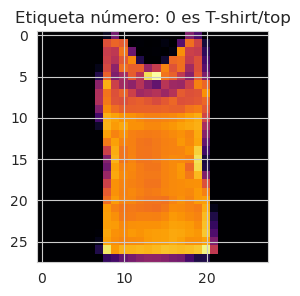

In [9]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.inferno)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

## Preprocesamiento de datos
Notemos la longitud del conjunto de entrenamiento y de test son respectivamente:

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Normalizar las imágenes para normalizar los valores de píxeles

In [11]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

## Red neuronal convolucional

In [12]:
# Construir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/home/nictez/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-30 12:42:14.545329: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Resumen del modelo anterior:

* **Entrada de la imagen**: Una imagen de 28x28 píxeles con un canal (blanco y negro).

* **Primera capa Conv2D**: Aplica 32 filtros 3x3, resultando en 32 mapas de características de 26x26.

* **Primera capa MaxPooling2D**: Reduce el tamaño de cada uno de los 32 mapas de características a 13x13.

* **Segunda capa Conv2D**: Aplica 64 filtros 3x3 a cada uno de los 32 mapas de características, resultando en 64 mapas de características de 11x11.

* **Segunda capa MaxPooling2D**: Reduce el tamaño de cada uno de los 64 mapas de características a 5x5.

* **Tercera capa Conv2D**: Aplica 64 filtros 3x3, resultando en 64 mapas de características de 3x3.

* **Flatten**: Aplana los mapas de características a un vector de 576 características.

* **Dense (64 unidades)**: Reducción de dimensionalidad y aprendizaje de patrones globales.

* **Dense (10 unidades)**: Salida final con 10 unidades (una para cada clase de Fashion MNIST).

Cada convolución extrae características y patrones más complejos a medida que profundiza en la red, permitiendo al modelo hacer predicciones más precisas sobre la clase de las imágenes. Cada filtro aprende a detectar diferentes características de la imagen, como bordes, texturas o patrones específicos:

La cantidad de filtros en una capa convolucional afecta la capacidad del modelo para aprender características representativas de los datos. En general, más filtros permiten al modelo aprender una variedad más amplia de características, pero también incrementan la complejidad computacional y el número de parámetros del modelo.

**Compilar el modelo**

Crear un optimizador Adam con una tasa de aprendizaje del 0.001

In [13]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [14]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # Compilar el modelo

Se compila el modelo utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica dispersa (sparse_categorical_crossentropy) para la clasificación. El parámetro from_logits=True indica que la salida de tu modelo no ha pasado por una función de activación como softmax y son logits.

Los logits son los valores brutos de salida de la última capa del modelo, y pueden ser cualquier número real, no necesariamente entre 0 y 1. La función SparseCategoricalCrossentropy con from_logits=True primero aplicará una función softmax internamente para convertir los logits en probabilidades antes de calcular la pérdida.

 También se puede usar directamente el nombre del optimizador ('adam') en el argumento optimizer de la función compile.

**Entrenar el modelo**

In [15]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels,), verbose=2)


Epoch 1/10


2025-10-30 12:42:24.431678: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 - 21s - 11ms/step - accuracy: 0.8148 - loss: 0.5081 - val_accuracy: 0.8671 - val_loss: 0.3767
Epoch 2/10
1875/1875 - 19s - 10ms/step - accuracy: 0.8816 - loss: 0.3283 - val_accuracy: 0.8872 - val_loss: 0.3176
Epoch 3/10
1875/1875 - 19s - 10ms/step - accuracy: 0.8973 - loss: 0.2799 - val_accuracy: 0.8915 - val_loss: 0.3004
Epoch 4/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9078 - loss: 0.2509 - val_accuracy: 0.8969 - val_loss: 0.2918
Epoch 5/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9155 - loss: 0.2272 - val_accuracy: 0.8999 - val_loss: 0.2755
Epoch 6/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9230 - loss: 0.2069 - val_accuracy: 0.9014 - val_loss: 0.2684
Epoch 7/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9297 - loss: 0.1903 - val_accuracy: 0.9069 - val_loss: 0.2658
Epoch 8/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9342 - loss: 0.1746 - val_accuracy: 0.9099 - val_loss: 0.2653
Epoch 9/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9407 - loss: 0.1581 - val_accuracy: 0.

Se entrena el modelo en los datos de entrenamiento utilizando fit. Se especifica el número de épocas, el tamaño del lote y la proporción de validación para monitorear el rendimiento del modelo durante el entrenamiento.

## Evaluación
**Evaluar el modelo en el conjunto de prueba**

In [16]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9049 - loss: 0.2834


Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando evaluate. Se obtienen la pérdida y la precisión del modelo en los datos de prueba.

## Predicciones

In [17]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Calcular la matriz de confusión

In [18]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

Se calculan las predicciones del modelo en el conjunto de prueba y se obtienen las clases predichas. Se calcula la matriz de confusión utilizando confusion_matrix.

**Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase**

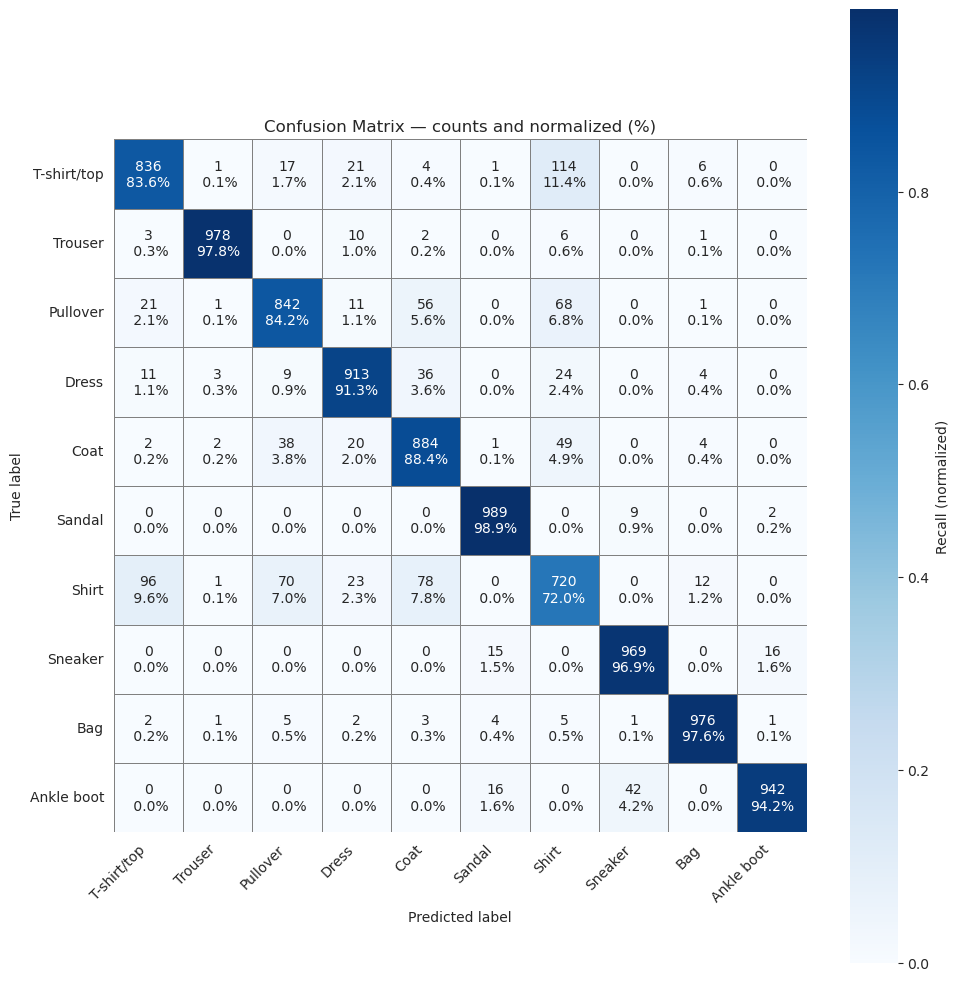

In [19]:
# python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# recompute confusion matrix (ensure variables exist: test_labels, predicted_labels, class_names)
cm = confusion_matrix(test_labels, predicted_labels)

# normalize by true class (rows); avoid division by zero
row_sums = cm.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm, row_sums, where=(row_sums != 0))

# create annotations with count and percent
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_norm[i, j]*100:4.1f}%"

# plot
plt.figure(figsize=(10, 10))
sns.heatmap(cm_norm, annot=annot, fmt="", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={"label": "Recall (normalized)"}, square=True,
            linewidths=0.5, linecolor="gray", annot_kws={"fontsize": 10})

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Confusion Matrix — counts and normalized (%)")
plt.tight_layout()
plt.show()


## BONUS:
Codigo para graficar una imagen con su etiqueta predicha

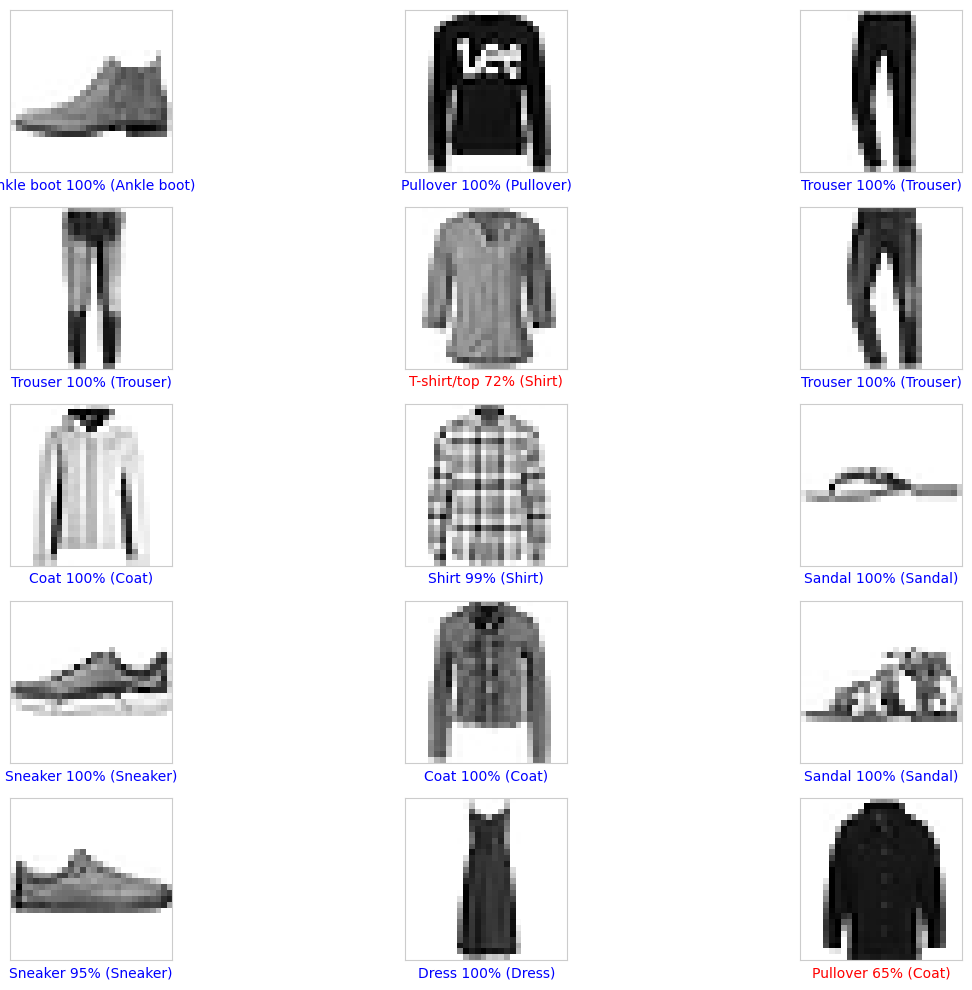

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()

In [21]:
#Evalución final
final_loss, final_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Precisión final en el conjunto de prueba: {final_acc:.4f}')

313/313 - 1s - 4ms/step - accuracy: 0.9049 - loss: 0.2834
Precisión final en el conjunto de prueba: 0.9049
